<a href="https://colab.research.google.com/github/ahmed-hassan1997/Investigate_TMDb_Movies/blob/master/Investigate_a_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Project:  Investigate_TMDb_Movies

ahmed hassan 

- introduction

In this project, you'll go through the data analysis process and see how everything fits together. Later Nanodegree projects will focus on individual pieces of the data analysis process.

You'll use the Python libraries NumPy, pandas, and Matplotlib, which make writing data analysis code in Python a lot easier! Not only that, these are sought-after skills by employers!


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="cleaning">data cleaning</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda"> Data visualization</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='question'></a>
## question

1- Q1: what is number of filw to director Colin Trevorrow?

2- Q2: what is the best director have high revenue?

3- Q3: what is the name of the film which have large run time?

4- q4: what is the high run time?


## include important libraries for data analysis 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

## import data and look ahead

In [2]:
df = pd.read_csv('/content/tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# list columns 

columns = list(df.columns)

print("number of sample is : ", str(len(df)) + " row ")

print("columns in data is \n  ",columns)

print("number of columns is : ",str(len(columns)) + " columns")


number of sample is :  10866 row 
columns in data is 
   ['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']
number of columns is :  21 columns


### **observation about data** 

- we need to remove unused column 
- remove duplicated data
- fill NAN value with mean of this column
- Changing  date column to date format.




In [4]:
unwanted_col = ['id','imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj']
df.drop(unwanted_col , axis = 1 , inplace = True)

df.head(2)


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


In [5]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum().sort_values(ascending = False)

production_companies    1030
cast                      76
director                  44
genres                    23
release_year               0
vote_average               0
vote_count                 0
release_date               0
runtime                    0
original_title             0
revenue                    0
budget                     0
popularity                 0
dtype: int64

### fill nan value
* production_companies  with mode
* cast with mode
* director with mode
* genres with mode

###### convert complex column into one value

## function to calculate mode

In [8]:
def cal_mode(x):
  return x.mode()[0]

## function to split column with multiple data into single data 

In [9]:
def split_column(x):
  x = x.str.split("|", n = -1, expand = True) 
  return x


In [10]:
## calculate mode
print(cal_mode(split_column(df['production_companies'])))


0    Universal Pictures
Name: 0, dtype: object


## fill nan value with mode 

* production_companies <p> Universal Pictures </p> 

* cast                 <p> Nicolas Cage </p>   
* director             <p>  Woody Allen </p>  
* genres               <p>  Drama </p> 

In [11]:
mode_production_company = cal_mode(split_column(df['production_companies']))
mode_director = cal_mode(split_column(df['director']))
mode_cast = cal_mode(split_column(df['cast']))
mode_genres = cal_mode(split_column(df['genres']))

df['production_companies'].fillna(value = mode_production_company[0], inplace = True)
df['cast'].fillna(value = mode_cast[0], inplace = True)
df['director'].fillna(value = mode_director[0], inplace = True)
df['genres'].fillna(value = mode_genres[0], inplace = True)



In [12]:
df.isnull().sum().sort_values(ascending = False)

release_year            0
vote_average            0
vote_count              0
release_date            0
production_companies    0
genres                  0
runtime                 0
director                0
cast                    0
original_title          0
revenue                 0
budget                  0
popularity              0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

## drop duplicated

In [13]:
print("sum of the duplicated data is : ", sum(df.duplicated()))

sum of the duplicated data is :  1


In [14]:
df.drop_duplicates(inplace= True)
print("sum of the duplicated data is : ", sum(df.duplicated()))

sum of the duplicated data is :  0


## fill non value with mean

In [15]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [16]:
df.replace(0,np.nan)
df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


In [17]:
df.dropna(inplace=True)
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10865 non-null  object 
 5   director              10865 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10865 non-null  object 
 8   production_companies  10865 non-null  object 
 9   release_date          10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


In [19]:
print(df.shape)

(10865, 13)


## fix data format

In [20]:
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10865 non-null  object 
 5   director              10865 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10865 non-null  object 
 8   production_companies  10865 non-null  object 
 9   release_date          10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


## function to convert date into object

In [21]:
date = df[['release_date','release_year']].copy()
date[['month','day','bad_year']] = date.release_date.str.split("/",expand=True) 
date["release_year"] = date["release_year"].astype(str)
date['date'] = date['release_year'] + '-' + date['month'] + '-' + date['day']
date['date'] = pd.to_datetime(date['date'])
date.head(1)


,release_date,release_year,month,day,bad_year,date
0,6/9/15,2015,6,9,15,2015-06-09


In [22]:
date.dtypes



release_date            object
release_year            object
month                   object
day                     object
bad_year                object
date            datetime64[ns]
dtype: object

## check some info about data

In [23]:
print("sum of duplicated data : " ,sum(df.duplicated()))

sum of duplicated data :  0


In [24]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [25]:
df.to_csv('clean_data.csv' ,index=False)

## data visualization  using single-variable

* draw director & vote_count
* popularity & budget
* runtime & popularity

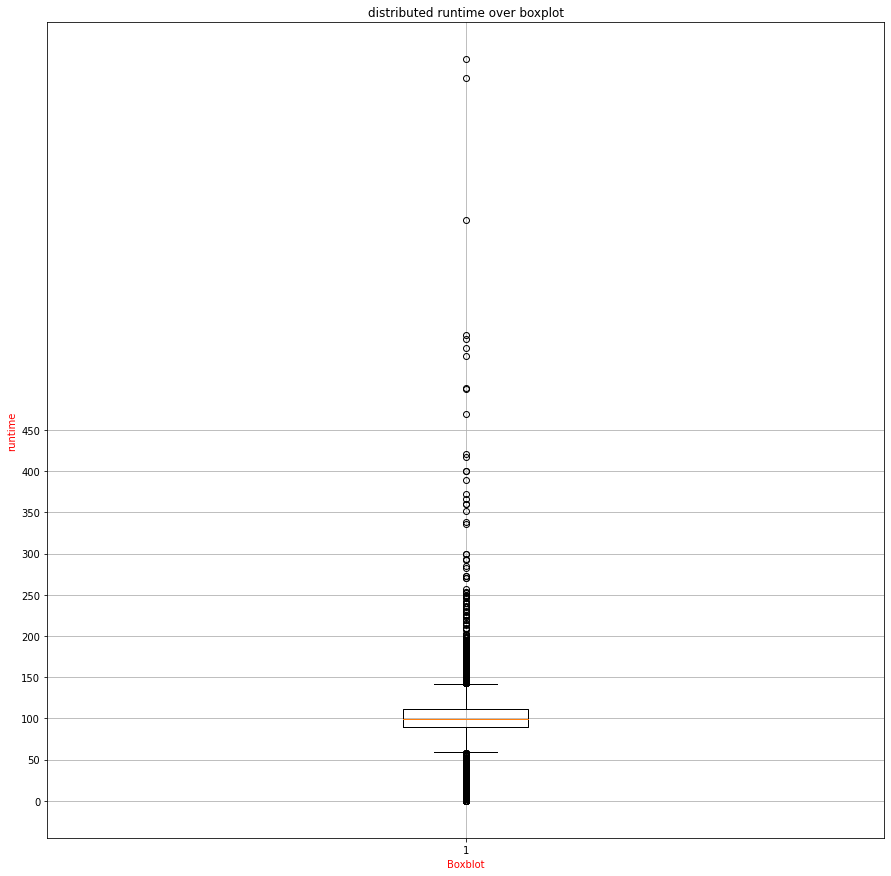

In [26]:
plt.figure(figsize=(15,15))
plt.grid()
plt.xlabel('Boxblot' , color = 'red')
plt.ylabel('runtime' , color = 'red')
plt.title('distributed runtime over boxplot')
plt.yticks([i for i in range(0,500,50)])
plt.boxplot(df['runtime'])
plt.show()

<h1> summary of this boxblot </h1>

## 75% from runtime is between (60,110)
## 25% from runtime is between(110,140)

In [27]:
df['vote_average'].value_counts().describe()

count     72.000000
mean     150.902778
std      169.668455
min        1.000000
25%        9.000000
50%       62.000000
75%      284.250000
max      496.000000
Name: vote_average, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (what is number of filw to director Colin Trevorrow )

In [28]:
data = df.query('director == "Colin Trevorrow"')
print("number of films which director Colin Trevorrow make : ",len(data))

number of films which director Colin Trevorrow make :  2


## this cell give number of films which Colin Trevorrow director has made 
* answer : 2 

### Research Question 2  (what is the best director have high revenue?)



In [29]:
x = []
max_revenue = df.query(' revenue == revenue.max()')
x = list(max_revenue['director'])
print("the best director achieve large revenue is : " ,x[0])


the best director achieve large revenue is :  James Cameron


### this cell return best director which have high revenue

* answer : James Cameron

### Research Question 3 (what is the name of the film which have large run time?) 

In [30]:
max_run_time = df[df['runtime'] == df['runtime'].max()]
name = list(max_run_time['original_title'])
print("the name of the film which have large run time is : " ,name[0][19:])



the name of the film which have large run time is :  An Odyssey


### this cell return the film which have high runtime

* answer : An Odyssey


### Research Question 4 (what is the high run time?) 

In [31]:
time = list(max_run_time['runtime'])
print("the most film have large run time is : " + str(time[0]) + " minutes")


the most film have large run time is : 900 minutes


### this cell return the  high runtime

* answer : 900

In [32]:
df.runtime.max()

900

Text(0, 0.5, 'frequency of geners')

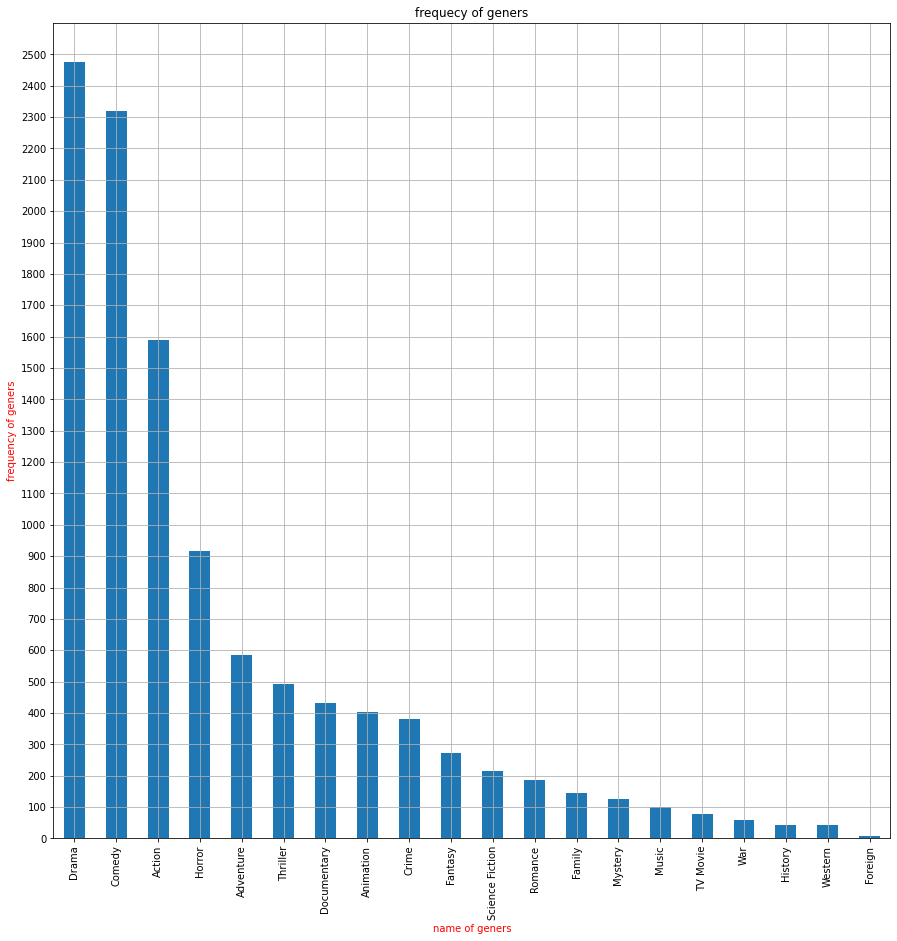

In [33]:

plt.figure(figsize=(15,15))
plt.yticks([i for i in range(0,3000,100)])
df['genres'] = split_column(df['genres'])
df['genres'].value_counts().plot(kind = 'bar' ,title='frequecy of geners')
plt.grid()
plt.xlabel('name of geners' , color = 'red')
plt.ylabel('frequency of geners' , color = 'red')

## this cell give summary about best genres
* drama has higest frequency (2450)
* foreign has lowest frequency (10)

## i want to know correlation between column 
- 1 positive correlation 

- -1 negative coorelation 

- 0 symetric

In [34]:
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
popularity,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806
budget,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904
revenue,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070
runtime,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187
vote_count,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962
vote_average,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576
release_year,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000


## draw heatmap
- confusion matrix between column

- this heat map show correlation between column and another 


Text(0.5, 1.0, 'correlation matrix for DataFrame')

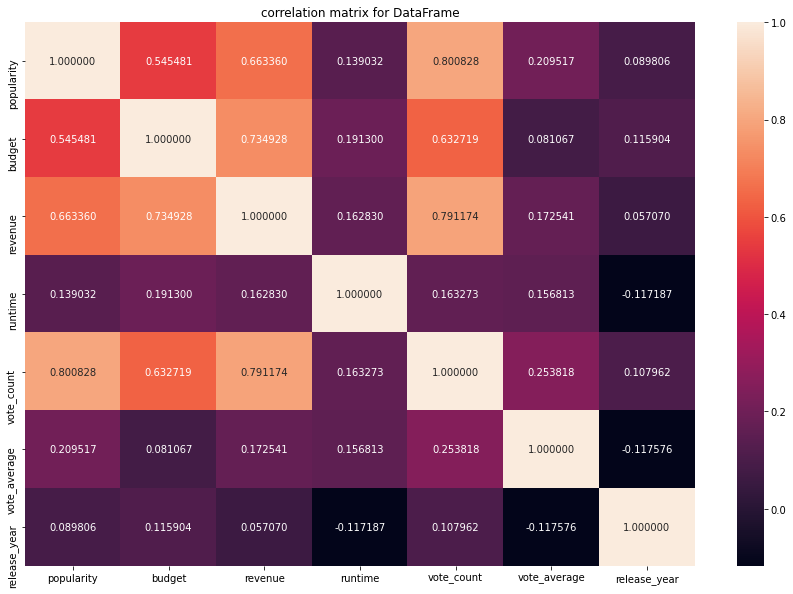

In [35]:
fig, ax = plt.subplots(figsize=(15,10))         
sns.heatmap(df.corr(), annot=True, fmt="f",ax=ax)
plt.title('correlation matrix for DataFrame')

## this cell give insight about correlation between column and other
* corr between (1,-1)
* high corr is 1 which have positive coreelation
* low corellation have -1 which is negative 

## conclusion 

* first read data from link dataset (10866  row) with 21 column
* i delete some column which i see it is unimportant
* after this i fill value with nan value with (mode)
* drop duplicated data from csv file
* check to there is no nan value in this column
* make some visualization on one variable data and multi variable
* after this i make some question and i answer to it


#### limitation

* first there is 1030 nan value in row data  and i didn,t want to remove it so decide to fill data with mode 

* then split complex column into single value
* take mode of column which have nan value 

<h1>  two solution is available to overcome nan value</h1>

<li> drop row with nan value and this will reduce dataset</li>
<li>  fill categorical data with mode which have high frequency</ki>

* two solution is available and i can decide which i make